In [1]:
library('tidyverse')
library('Seurat')
library('patchwork')
library('ggrepel')
library('ggrepel')

org_opts <- options()

exp_thold <- 0.5
exp_strict_thold <- 0.01

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Attaching SeuratObject



In [2]:
obs_006_pd_tils <-
    readRDS('data/pd_tils-seurat.Rdata')

obs_006_pd_tils

An object of class Seurat 
19912 features across 802 samples within 1 assay 
Active assay: RNA (19912 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [3]:
obs_006_pd_tils[['sample_name']] %>%
    table()

sample_name
OBS-006-001 OBS-006-002 OBS-006-003 OBS-006-004 OBS-006-005 OBS-006-007 
          0           0           0           0         379         423 

In [4]:
obs_006_pd_tils[['sample_name']] <-
    obs_006_pd_tils[['sample_name']] %>%
    pull(`sample_name`) %>%
    factor()

In [5]:
obs_006_pd_tils[['sample_name']] %>%
    table()

sample_name
OBS-006-005 OBS-006-007 
        379         423 

In [6]:
system.time({
    
    obs_006_pd_tils %<>%
        # No need to re-normalize data
        FindVariableFeatures(
            selection.method="vst",
            nfeatures=2000
        ) %>%
        ScaleData(., features=rownames(.)) %>%
        JackStraw(num.replicate=100) %>%
        ScoreJackStraw(dims=1:20) %>%
        RunPCA(., features=VariableFeatures(object=.)) %>%
        RunUMAP(dims=1:10) %>%
        FindNeighbors(dims=1:10) %>%
        FindClusters(resolution=0.5)
    
})

Centering and scaling data matrix

PC_ 1 
Positive:  TUBB, TOP2A, TUBA1B, HIST1H4C, UBE2C, NUSAP1, STMN1, HIST1H1B, MKI67, DIAPH3 
	   ASPM, HIST1H2AJ, HMGB2, CKS1B, HIST1H3B, RRM2, KNL1, CENPF, HMGB1, CDK1 
	   TYMS, CENPW, KIF11, BIRC5, H2AFZ, SPC25, TPX2, DLGAP5, NCAPG, HIST1H1D 
Negative:  CCL5, GZMB, CLIC3, GNLY, S100A6, IL32, GZMA, ZNF683, CD7, CXCR6 
	   ZFP36, TIMP2, GZMH, METRNL, MATK, CEBPB, FBXL7, ICOS, RASGRF2, DDIT4 
	   KLRD1, EGR1, COL3A1, CD83, ATP8A1, SLC25A4, LTB, MX1, CALD1, ANXA1 
PC_ 2 
Positive:  XCL1, XCL2, CRTAM, CCL1, TNFRSF4, TMSB10, TIE1, CD74, HLA-DPA1, GNG4 
	   HLA-DRA, REL, HLA-DQB1, HLA-DRB1, CCL22, FSTL3, CCR7, DHRS3, CAMK2N1, GRIK4 
	   PDLIM4, GEM, HLA-DQA1, EBI3, TNFRSF18, RPS18, JUNB, CAVIN3, IL1RN, RGCC 
Negative:  GNLY, CCL5, CMIP, GZMA, KLRC1, GZMB, IL32, RNF125, HPGD, ITGAE 
	   SYTL3, DDIT4, METRNL, PPP1R16B, PLEKHA5, GZMH, MBNL1, EML4, PDE7B, KLRD1 
	   CEBPB, ENTPD1, PDE3B, IKZF3, ICOS, STAT4, CSF1, NELL2, ITM2C, SMC4 
PC_ 3 
Positive:  RABGA

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 802
Number of edges: 26574

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 4
Elapsed time: 0 seconds


   user  system elapsed 
 53.518  11.576  16.966 

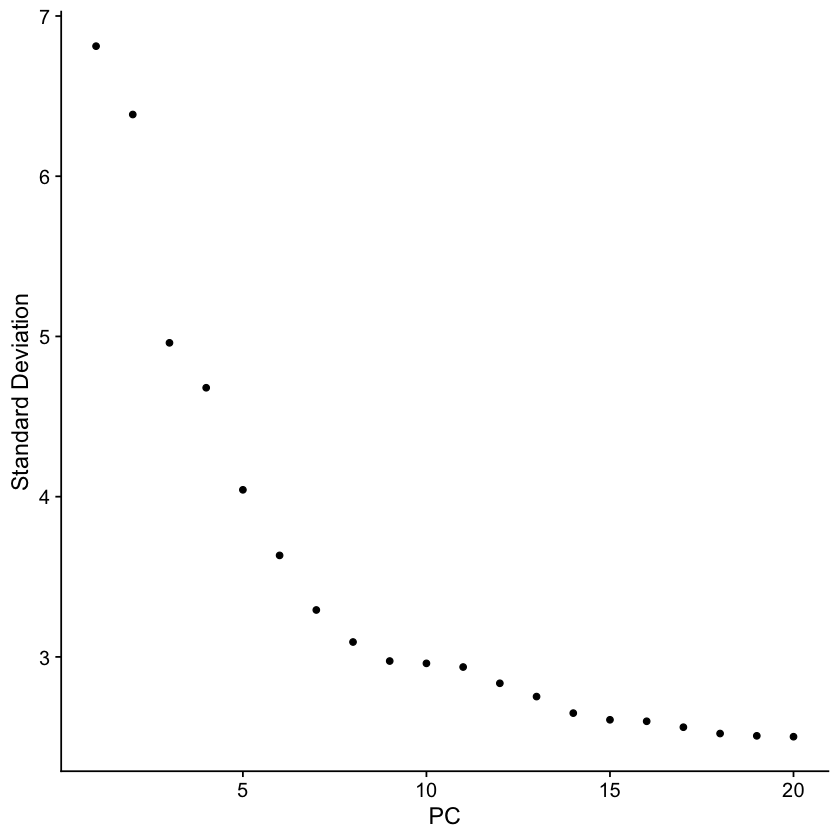

In [7]:
ElbowPlot(obs_006_pd_tils)

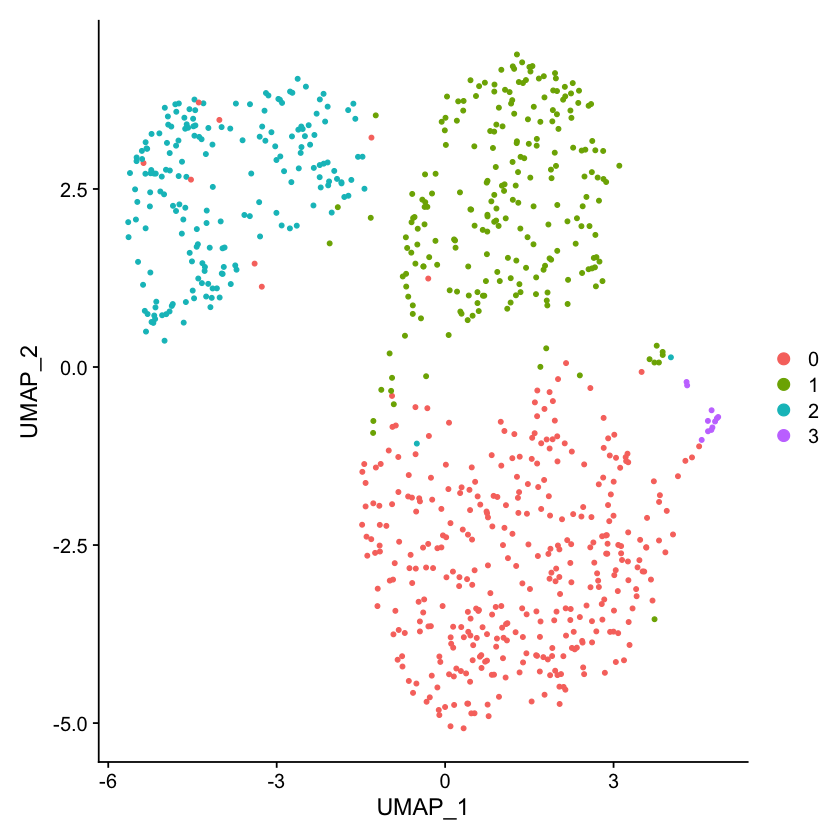

In [8]:
DimPlot(obs_006_pd_tils, reduction="umap")

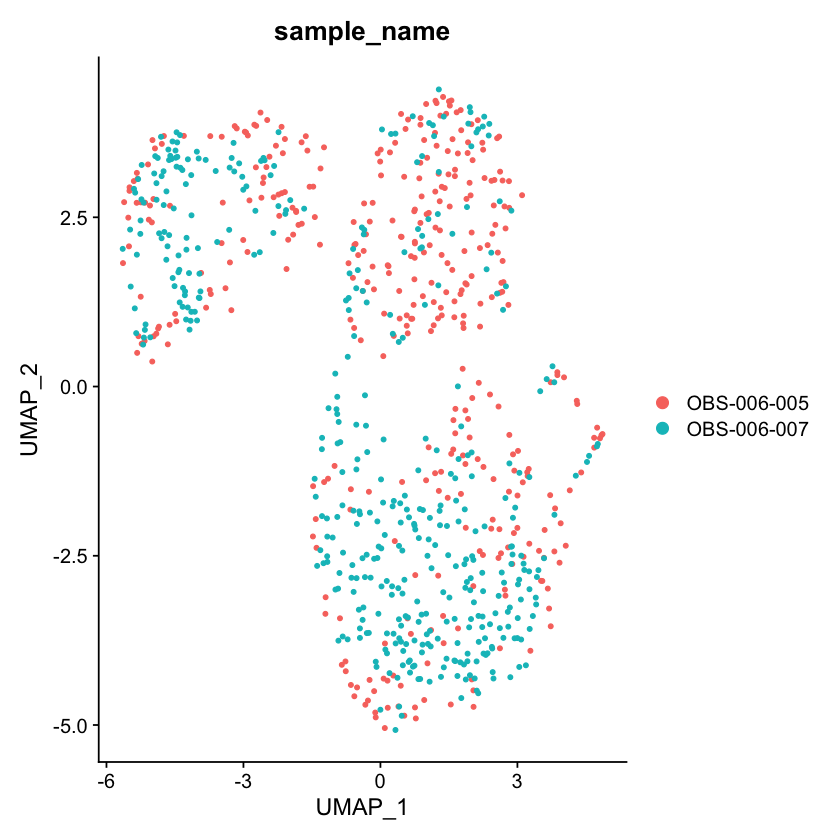

In [9]:
DimPlot(obs_006_pd_tils, reduction="umap", group.by='sample_name')

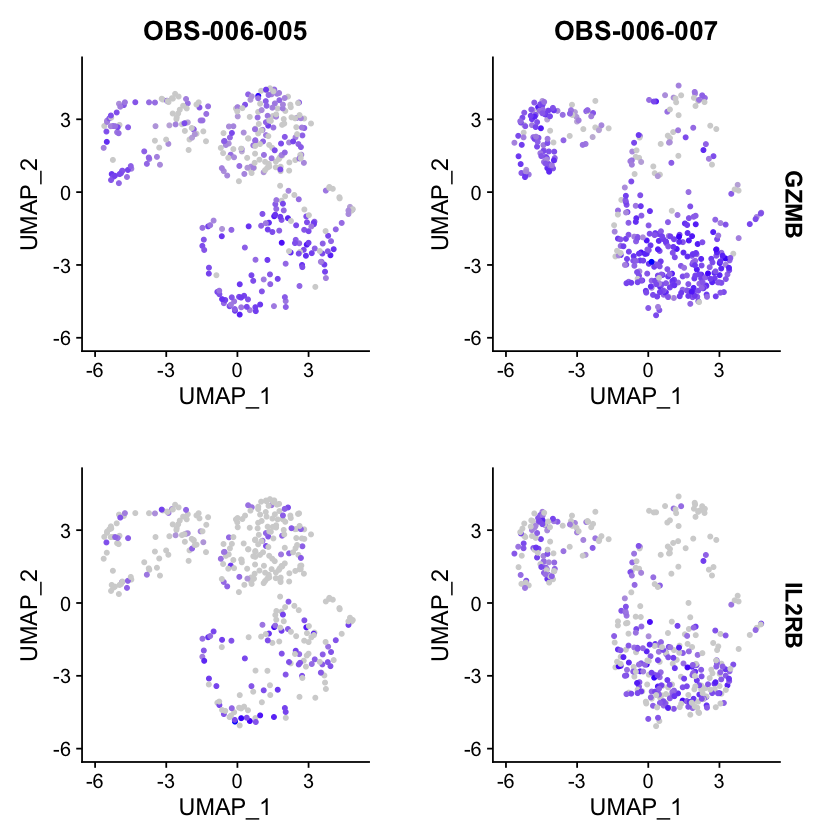

In [10]:
FeaturePlot(obs_006_pd_tils, features=c('GZMB', 'IL2RB'), split.by='sample_name')

In [11]:
system.time({

    all_markers <-
        FindAllMarkers(obs_006_pd_tils, only.pos=TRUE, min.pct=0.25, logfc.threshold=0.25)
    
})



Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



   user  system elapsed 
  4.961   0.236   5.490 

In [12]:
all_markers %>%
    group_by(cluster) %>%
    slice_max(n=5, order_by = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.441115e-71,1.993675,0.978,0.606,6.851948e-67,0,GNLY
7.255510e-77,1.475168,0.995,0.947,1.444717e-72,0,CCL5
1.890100e-49,1.418078,0.940,0.636,3.763568e-45,0,GZMB
3.228295e-32,1.374279,0.726,0.403,6.428180e-28,0,IL32
1.639565e-19,1.360184,0.340,0.092,3.264702e-15,0,CLIC3
4.504676e-42,2.928151,0.513,0.089,8.969711e-38,1,CCL1
6.438179e-60,2.289413,0.871,0.312,1.281970e-55,1,XCL2
1.054508e-59,2.237669,0.802,0.221,2.099737e-55,1,CRTAM
1.757081e-55,1.904289,0.914,0.374,3.498699e-51,1,XCL1


In [13]:
Idents(obs_006_pd_tils) <- "orig.ident"

dge_tbl <-
    FindMarkers(obs_006_pd_tils, ident.1="OBS-006-007", ident.2="OBS-006-005", min.pct=0) %>%
    rownames_to_column(var='gene') %>%
    as_tibble() %>%
    mutate(`mlog10p`=-log10(`p_val`))

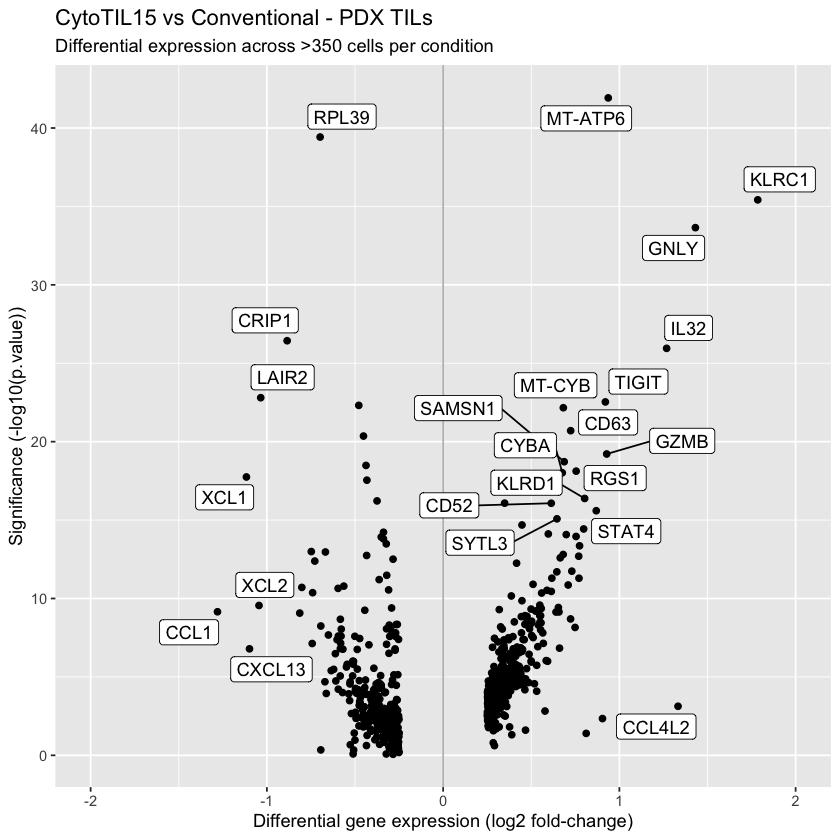

In [14]:
dge_tbl %>%
    mutate(
        `label`=case_when(
            `mlog10p` > 15 & (`avg_log2FC` > 0.5 | `avg_log2FC` < -0.5) ~ `gene`,
            `avg_log2FC` > 1 ~ `gene`,
            `avg_log2FC` < -1 ~ `gene`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`avg_log2FC`, y=`mlog10p`)) +
        geom_vline(xintercept=0, color='gray') +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        xlim(-2, 2) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='CytoTIL15 vs Conventional - PDX TILs',
            subtitle='Differential expression across >350 cells per condition'
        )

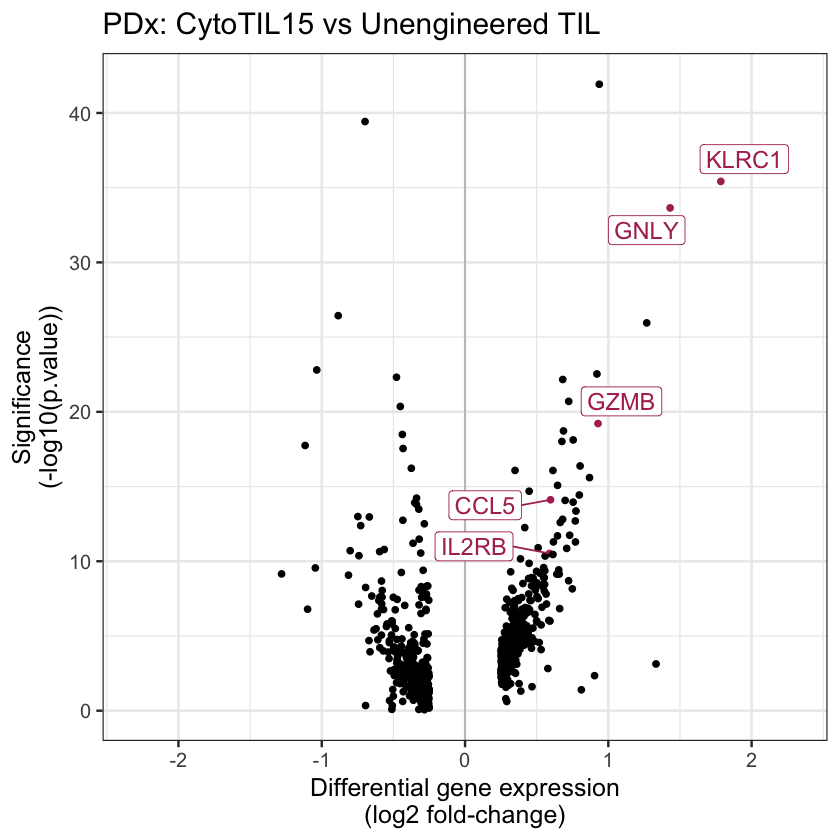

In [15]:
dge_gois <- c('KLRC1', 'GNLY', 'CCL5', 'GZMB', 'EOMES', 'TCF1', 'IL2RB')

dge_tbl %>%
    mutate(
        `label`=case_when(
            `gene` %in% dge_gois ~ `gene`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`avg_log2FC`, y=`mlog10p`, color=`label` != '')) +
        geom_vline(xintercept=0, color='gray') +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf, size=5) +
        xlim(-2.3, 2.3) +
        labs(
            x='Differential gene expression\n(log2 fold-change)',
            y='Significance\n(-log10(p.value))',
            title='PDx: CytoTIL15 vs Unengineered TIL'
        ) +
        scale_color_manual(values=c('black', 'maroon')) +
        theme_bw(base_size = 15) +
        theme(legend.position='none')

In [16]:
dge_tbl %>%
    write_csv('dge-conv_vs_cytotil15-005_vs_007.csv')